In [131]:
import cv2
import skimage
from skimage.segmentation import slic, mark_boundaries
from skimage import color
import matplotlib.pyplot as plt
from skimage.future import graph
import os

In [137]:
def read_images(path="data/MSRC_ObjCategImageDatabase_v1"):
    images = os.listdir(path)
    targets = list(filter(lambda x: x[-6:] == "GT.bmp", images))
    sources = list(filter(lambda x: x[-6:] != "GT.bmp" and x[-4:] == ".bmp", images))
    sources = sorted(sources)
    targets = sorted(targets)
    return sources, targets


def get_super_pixels(img, n_segments, compactness, sigma):
    super_pixels = slic(img, n_segments=n_segments, compactness=compactness, sigma=sigma, start_label=1)
    return super_pixels


def get_semantic_segmentation(img, n_segments=400, compactness=30, sigma=1):
    super_pixels = get_super_pixels(img, n_segments, compactness, sigma)
    marked = mark_boundaries(img, super_pixels)
    out_marked = color.label2rgb(super_pixels, img, kind='avg', bg_label=0)
    g = graph.rag_mean_color(img, super_pixels, mode='similarity')
    labels = graph.cut_normalized(super_pixels, g)
    out = color.label2rgb(labels, img, kind='avg')
    return out, out_marked, marked


def plot_segmented_images(img, trg, n_segments=400, compactness=30, sigma=1):
    out, out_marked, marked = get_semantic_segmentation(img, n_segments, compactness, sigma)

    fig, ax = plt.subplots(2, 2, figsize=(20, 10))

    ax[0, 0].imshow(img)
    ax[0, 0].set_title("Original")

    ax[0, 1].imshow(out_marked)
    ax[0, 1].set_title("Superpixels")

    ax[1, 0].imshow(out)
    ax[1, 0].set_title("Result")

    ax[1, 1].imshow(trg)
    ax[1, 1].set_title("Ground-truth")
    
    plt.show()

In [133]:
src, trg = read_images()
print(src)
print(trg)

['1_10_s.bmp', '1_11_s.bmp', '1_12_s.bmp', '1_13_s.bmp', '1_14_s.bmp', '1_15_s.bmp', '1_16_s.bmp', '1_17_s.bmp', '1_18_s.bmp', '1_19_s.bmp', '1_1_s.bmp', '1_20_s.bmp', '1_21_s.bmp', '1_22_s.bmp', '1_23_s.bmp', '1_24_s.bmp', '1_25_s.bmp', '1_26_s.bmp', '1_27_s.bmp', '1_28_s.bmp', '1_29_s.bmp', '1_2_s.bmp', '1_30_s.bmp', '1_3_s.bmp', '1_4_s.bmp', '1_5_s.bmp', '1_6_s.bmp', '1_7_s.bmp', '1_8_s.bmp', '1_9_s.bmp', '2_10_s.bmp', '2_11_s.bmp', '2_12_s.bmp', '2_13_s.bmp', '2_14_s.bmp', '2_15_s.bmp', '2_16_s.bmp', '2_17_s.bmp', '2_18_s.bmp', '2_19_s.bmp', '2_1_s.bmp', '2_20_s.bmp', '2_21_s.bmp', '2_22_s.bmp', '2_23_s.bmp', '2_24_s.bmp', '2_25_s.bmp', '2_26_s.bmp', '2_27_s.bmp', '2_28_s.bmp', '2_29_s.bmp', '2_2_s.bmp', '2_30_s.bmp', '2_3_s.bmp', '2_4_s.bmp', '2_5_s.bmp', '2_6_s.bmp', '2_7_s.bmp', '2_8_s.bmp', '2_9_s.bmp', '3_10_s.bmp', '3_11_s.bmp', '3_12_s.bmp', '3_13_s.bmp', '3_14_s.bmp', '3_15_s.bmp', '3_16_s.bmp', '3_17_s.bmp', '3_18_s.bmp', '3_19_s.bmp', '3_1_s.bmp', '3_20_s.bmp', '3_21_s.bm

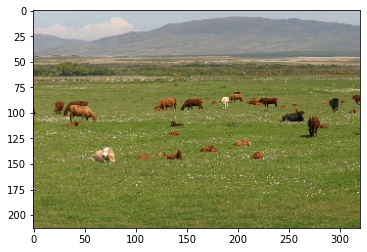

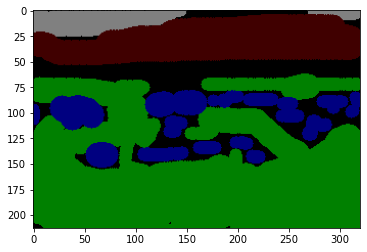

In [134]:
img = skimage.io.imread("data/MSRC_ObjCategImageDatabase_v1/" +  src[0])
plt.imshow(img)
plt.show()
img_seg = skimage.io.imread("data/MSRC_ObjCategImageDatabase_v1/" +  trg[0])
plt.imshow(img_seg)
plt.show()

In [135]:
# out, out_marked, marked = get_semantic_segmentation(img)

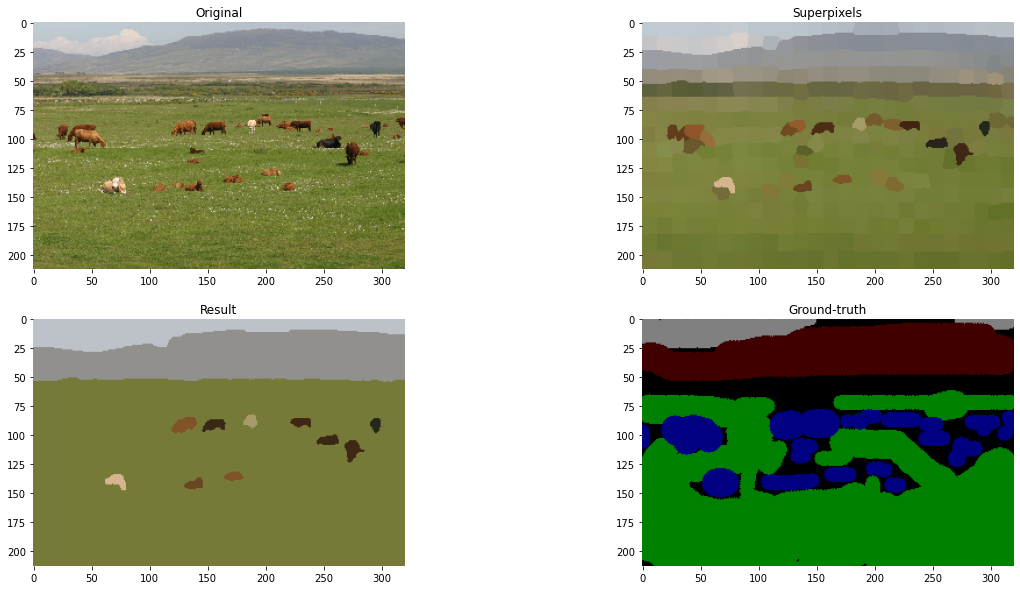

In [136]:
plot_segmented_images(img, img_seg, 400, 30, 1)